In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.max_rows", None)  # 모든 열 표시
pd.set_option("display.expand_frame_repr", False)  # 가로로 긴 데이터프레임 줄바꿈 방지

In [2]:
import pyreadstat
from lifelines import KaplanMeierFitter
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from psmpy import PsmPy
import numpy as np

df = pd.read_csv("2nd Preprocessing.csv")

In [3]:
df.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'Steatosis Score', 'NASH',
       'Fibrosis Stage', 'NAFLD Type', 'Death', 'Death Date', 'Weight',
       'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U',
       'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP',
       'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI',
       'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)',
       'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)',
       'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume',
       'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)',
       'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil',
       'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL',
       'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

In [ ]:
df["Waist"] = pd.to_numeric(df["Waist"], errors="coerce")
df["Height"] = pd.to_numeric(df["Height"], errors="coerce")

df["Waist to Height"] = df["Waist"] / df["Height"]

In [ ]:
import pandas as pd
from datetime import datetime

# Ensure the 'Birth Date' and 'Death Date' columns are in datetime format
df["Birth Date"] = pd.to_datetime(df["Birth Date"], errors="coerce")
df["Death Date"] = pd.to_datetime(df["Death Date"], errors="coerce")
df["Last F/U"] = pd.to_datetime(df["Last F/U"], errors="coerce")
df["LRE Date"] = pd.to_datetime(df["LRE Date"], errors="coerce")
df["CT_B date"] = pd.to_datetime(df["CT_B date"], errors="coerce")
df["FS_date"] = pd.to_datetime(df["FS_date"], errors="coerce")

# Today's date
# today = pd.to_datetime('2025-02-12') # 2025-02-12

# Calculate age
# df['Age'] = (df['Death Date'].fillna(today) - df['Birth Date']).dt.days // 365

In [ ]:
df["Fibrosis Stage"] = df["Fibrosis Stage"].apply(lambda x: 1 if x == "High" else 0)
df["NASH"] = df["NASH"].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
# Original column list
cols = df.columns.tolist()

# Move 'Death' before 'Death Date'
cols.insert(cols.index("Death Date"), cols.pop(cols.index("Death")))

# Move 'NASH' before 'Fibrosis Stage'
cols.insert(cols.index("Fibrosis Stage"), cols.pop(cols.index("NASH")))

# Move 'Waist to Height' before 'BMI'
cols.insert(cols.index("BMI"), cols.pop(cols.index("Waist to Height")))

# Move 'Age' before 'Birth Date'
cols.insert(cols.index("Birth Date"), cols.pop(cols.index("Age")))

cols.insert(cols.index("당뇨병/당뇨병 전단계 유무"), cols.pop(cols.index("FIB-4")))


# Move 'Weight', 'Height', 'Waist to Height', 'BMI' before 'Waist'
for col in ["Weight", "Height", "Waist to Height", "BMI"]:
    cols.insert(cols.index("Waist"), cols.pop(cols.index(col)))

# Move 'Weight', 'Height', 'Waist to Height', 'BMI' before 'Waist'
for col in ["VFI", "SFI", "TFI", "SMI"]:
    cols.insert(cols.index("VFA (Volume)"), cols.pop(cols.index(col)))

# Move 'Age' before 'Birth Date'
cols.insert(cols.index("BMI"), cols.pop(cols.index("Waist")))
cols.insert(cols.index("BMI"), cols.pop(cols.index("BMI_C")))
cols.insert(cols.index("LSM"), cols.pop(cols.index("LSM_C")))
cols.insert(cols.index("FIB-4"), cols.pop(cols.index("FIB-4_C")))

# Reorder DataFrame columns
df = df[cols]

# Display reordered columns
print(df.columns.tolist())

['ID', 'Sex', 'Birth Date', 'Age', 'Steatosis Score', 'Fibrosis Stage', 'NASH', 'NAFLD Type', 'Death Date', 'Death', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Height', 'Weight', 'Last F/U', 'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFA (Volume)', 'SMI', 'TFI', 'SFI', 'VFI', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date', 'LSM', 'LSM_C', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', '당뇨병/당뇨병 전단계 유무', 'FIB-4', 'FIB-4_C', '고혈압유무', '이상지질혈증 유무', 'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무', 'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis']


In [8]:
df.head()

,ID,Sex,Birth Date,Age,Steatosis Score,Fibrosis Stage,NASH,NAFLD Type,Death Date,Death,Waist to Height,Waist,BMI_C,BMI,Height,Weight,Last F/U,Smoking,Ascites,Ascites_Date,VB,VB_Date,HEP,HEP_Date,HRS,HRS_Date,LT,LT_Date,SBP,DBP,VFA (Volume),SMI,TFI,SFI,VFI,SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen Volume,Liver/Spleen HU,Liver (HU),Spleen (HU),Liver (PDFF),CT_B date,FS_date,LSM,LSM_C,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,당뇨병/당뇨병 전단계 유무,FIB-4,FIB-4_C,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis
0,463012,1,1947-02-15,78,0.0,0,0,Others,NaT,0,4.695936,779.525452,1,19.596458,166.0,54.0,2023-10-12,0.0,0,NaN,0,NaN,1,2017-04-23,0,NaN,0,NaN,146.0,93.0,931.576625,40.590610,515.661539,177.594830,338.066710,489.380313,33.755488,115.709424,53.915806,111.851484,-70.468102,-86.460602,40.259583,26.593632,0.715663,115.377953,161.218246,0.146299,2017-08-14,NaT,7.7,2,280.0,27.0,13.0,1.0,261.0,0.83,4.3,103.0,6.1,79.340,179.0,70.0,91.0,110.0,0,2.237928,1,1,1,0,0,1,0,NaT,0
1,543747,0,1947-12-22,77,0.0,0,0,None,NaT,0,5.082502,813.200378,1,22.265625,160.0,57.0,2021-01-25,0.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,124.0,85.0,1032.168688,36.138359,946.853247,543.662354,403.190894,1391.775625,110.074938,106.421807,172.502012,92.514199,-98.940834,-105.830856,24.545614,8.252824,1.347252,53.397648,39.634502,6.522456,2011-07-07,NaT,7.7,2,280.0,20.0,24.0,1.1,222.0,0.97,4.5,88.0,6.4,80.519,193.0,44.0,106.5,149.0,0,1.415996,0,0,0,0,0,0,0,NaT,0
2,556772,0,1952-01-14,73,0.0,0,0,None,NaT,0,4.989280,788.306213,1,21.631149,158.0,54.0,2023-10-16,0.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,105.0,74.0,508.070781,33.052451,673.106035,469.584652,203.521383,1172.271125,143.808031,89.713623,151.592969,82.512139,-102.518898,-114.544617,29.191065,4.939308,1.124264,52.507729,46.704075,7.686099,2017-05-11,2017-03-24,3.4,0,206.0,24.0,27.0,0.8,285.0,1.05,3.9,138.0,5.6,106.448,215.0,56.0,158.0,108.0,0,1.183062,0,0,1,0,0,0,0,NaT,0
3,1124503,1,1980-11-05,44,1.0,0,0,Probable NASH,NaT,0,4.941534,849.943909,2,26.027582,172.0,77.0,2021-03-23,0.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,140.0,95.0,1053.408625,66.362202,731.264155,375.190390,356.073765,1109.963250,175.678844,123.377666,112.070576,196.325938,-104.391289,-106.446663,51.848907,7.628467,0.757789,37.518139,49.510033,15.822743,2014-07-03,NaT,7.7,2,280.0,33.0,64.0,1.2,267.0,1.00,4.7,91.0,6.4,94.747,202.0,44.0,106.5,137.0,0,0.679775,0,0,0,0,0,0,0,NaT,1
4,1132625,0,1963-08-18,61,1.0,1,1,NASH,NaT,0,4.553938,696.752563,1,19.650562,153.0,46.0,2023-07-13,0.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,100.0,72.0,367.436000,40.749702,439.663110,282.699549,156.963561,661.771375,318.200906,63.613037,115.604648,95.390977,-88.249924,-96.067482,26.033854,4.009127,1.143369,43.086437,37.683739,13.075651,2014-09-02,2014-09-22,10.6,3,200.0,60.0,44.0,0.6,104.0,1.25,2.4,110.0,6.4,150.751,135.0,16.0,97.0,163.0,0,5.305440,2,0,0,0,0,0,0,NaT,3


In [ ]:
# Count the number of missing (NA) values in each column
missing_counts = df.isna().sum()

# Alternatively, display as a DataFrame for better formatting
missing_summary = missing_counts.to_frame(name="Missing_Counts").reset_index()
missing_summary.columns = ["Column", "Missing_Counts"]
missing_summary

,Column,Missing_Counts
0,ID,0
1,Sex,0
2,Birth Date,0
3,Age,0
4,Steatosis Score,0
5,Fibrosis Stage,0
6,NASH,0
7,NAFLD Type,0
8,Death Date,275
9,Death,0


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          285 non-null    int64         
 1   Sex                         285 non-null    int64         
 2   Birth Date                  285 non-null    datetime64[ns]
 3   Age                         285 non-null    int64         
 4   Steatosis Score             285 non-null    float64       
 5   Fibrosis Stage              285 non-null    int64         
 6   NASH                        285 non-null    int64         
 7   NAFLD Type                  285 non-null    object        
 8   Death Date                  10 non-null     datetime64[ns]
 9   Death                       285 non-null    int64         
 10  Waist to Height             285 non-null    float64       
 11  Waist                       285 non-null    float64       

In [11]:
combined_data = df.copy()

In [12]:
# Step 1: Copy the original LRE column to a new column
combined_data["LRE Original"] = combined_data["LRE"]

# Step 2: Replace values in the LRE column
combined_data["LRE"] = combined_data["LRE"].apply(lambda x: 0 if x == 0 else 1)

In [13]:
lre_dist = pd.crosstab(index=combined_data["NAFLD Type"], columns=combined_data["LRE"])
lre_dist.columns = ["LRE = 0", "LRE = 1"]
lre_dist = lre_dist.sort_index()  # Optional: sort by NAFLD Type
display(lre_dist)

,LRE = 0,LRE = 1
NAFLD Type,,
Cirrhosis,18,7
NAFL,64,5
NASH,62,8
None,20,0
Others,42,14
Probable NASH,40,5


In [14]:
combined_data["Fibrosis"].unique()

array([0, 1, 3, 2, 4], dtype=int64)

Feature: VFI - VFA(Volume), AUC: 0.645, Spearman Corr: -0.241, Flip Decision: Flip
Best Cutoff: 191.828 | Sensitivity: 0.598 | Specificity: 0.660


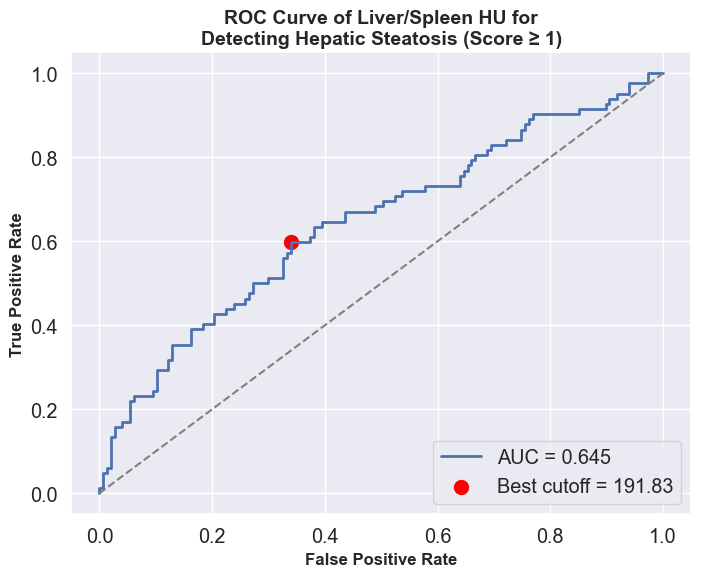

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Use combined_data as the base DataFrame
df = combined_data.copy()

# ✅ Choose subgroup here
subgroup = [
    "None",
    "NAFL",
    "Probable NASH",
    "NASH",
    "Cirrhosis",
]  # ← You can change this
df = df[df["NAFLD Type"].isin(subgroup)].copy()

# Define the target variable
df["Fibrosis Label"] = (df["Steatosis Score"].isin([2, 3])).astype(int)
target = "Fibrosis Label"

# Define feature
df["VFI - VFA(Volume)"] = df["VFI"] - 0.44 * df["VFA (Volume)"]
feature = "VFI - VFA(Volume)"
X = df[feature]
y = df[target]

# Calculate AUC
auc = roc_auc_score(y, X)

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(X, y)

# Flip AUC and values if necessary
if auc < 0.5:
    auc = 1 - auc
    X = X.max() - X  # Flip values

# Determine if flipping is recommended
flip_decision = "Flip" if spearman_corr < 0 else "Do NOT Flip"
print(
    f"Feature: {feature}, AUC: {auc:.3f}, Spearman Corr: {spearman_corr:.3f}, Flip Decision: {flip_decision}"
)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, X)

# Calculate Youden’s J statistic to find best cutoff
youden_index = tpr - fpr
best_idx = np.argmax(youden_index)
best_cutoff = thresholds[best_idx]
best_sens = tpr[best_idx]
best_spec = 1 - fpr[best_idx]

print(
    f"Best Cutoff: {best_cutoff:.3f} | Sensitivity: {best_sens:.3f} | Specificity: {best_spec:.3f}"
)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line

# Annotate best cutoff
plt.scatter(
    fpr[best_idx],
    tpr[best_idx],
    color="red",
    label=f"Best cutoff = {best_cutoff:.2f}",
    s=100,
)
plt.title(
    "ROC Curve of Liver/Spleen HU for\nDetecting Hepatic Steatosis (Score ≥ 1)",
    fontsize=14,
    fontweight="bold",
)  # plt.title(f"ROC Curve for {feature}({', '.join(subgroup)})", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot (optional)
save_path = "ROC_LiverSpleenHU_Score.png"  # ← Change filename as needed
plt.savefig(save_path, dpi=600, bbox_inches="tight")

plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


# Apply cutoff to get predictions

y_pred = (X >= best_cutoff).astype(int)


# Evaluation metrics

accuracy = accuracy_score(y, y_pred)

precision = precision_score(y, y_pred)

recall = recall_score(y, y_pred)

f1 = f1_score(y, y_pred)

conf_matrix = confusion_matrix(y, y_pred)


# Print results

print("\n🔍 Evaluation Metrics")

print(f"Accuracy:  {accuracy:.3f}")

print(f"Precision: {precision:.3f}")

print(f"Recall:    {recall:.3f}")

print(f"F1-score:  {f1:.3f}")

print("\nConfusion Matrix:")

print(conf_matrix)

print(f"Best cutoff: {best_cutoff}")


🔍 Evaluation Metrics
Accuracy:  0.638
Precision: 0.495
Recall:    0.598
F1-score:  0.541

Confusion Matrix:
[[97 50]
 [33 49]]
Best cutoff: 191.82818138584787


In [ ]:
# ✅ Choose subgroup here
subgroup = [
    "None",
    "NAFL",
    "Probable NASH",
    "NASH",
    "Cirrhosis",
]  # ← You can change this

# Step 1: Filter the data where NASH == 1
nash_data = combined_data[combined_data["NAFLD Type"].isin(subgroup)].copy()
nash_data["baseline_date"] = nash_data[["CT_B date", "FS_date"]].min(axis=1)

nash_data["event_observed_RFS"] = nash_data["LRE"]
nash_data["RFS_days"] = np.where(
    nash_data["LRE"] == 0,
    (
        pd.to_datetime("2025-02-12") - nash_data["baseline_date"]
    ).dt.days,  # If LRE == 0, use Last F/U
    (
        nash_data["LRE Date"] - nash_data["baseline_date"]
    ).dt.days,  # If LRE == 1, use LRE Date
)

# Step 2: Split into matched_treated (LRE == 1) and matched_control (LRE == 0)
# matched_treated = nash_data[nash_data["NAFLD Type"].isin(["NAFL","Probable NASH", "NASH", "Cirrhosis"])].reset_index(drop=True)
# matched_control = nash_data[nash_data["NAFLD Type"].isin(["None"])].reset_index(drop=True)

# Step 2: Split into matched_treated (LRE == 1) and matched_control (LRE == 0)
nash_data["VFI - VFA(Volume)"] = nash_data["VFI"] - 0.44 * nash_data["VFA (Volume)"]

matched_treated = nash_data[nash_data["Liver/Spleen HU"] >= 0.8].reset_index(drop=True)
matched_control = nash_data[nash_data["Liver/Spleen HU"] < 0.8].reset_index(drop=True)

# Display the sizes of the new datasets
print(f"Matched Treated: {matched_treated.shape}")
print(f"Matched Control: {matched_control.shape}")

Matched Treated: (152, 82)
Matched Control: (77, 82)


In [18]:
# Identify rows where RFS_days is negative
negative_rfs_rows = nash_data[nash_data["RFS_days"] < 0]
negative_rfs_rows

,ID,Sex,Birth Date,Age,Steatosis Score,Fibrosis Stage,NASH,NAFLD Type,Death Date,Death,Waist to Height,Waist,BMI_C,BMI,Height,Weight,Last F/U,Smoking,Ascites,Ascites_Date,VB,VB_Date,HEP,HEP_Date,HRS,HRS_Date,LT,LT_Date,SBP,DBP,VFA (Volume),SMI,TFI,SFI,VFI,SFA (Volume),Spleen (Volume),VFA (Area),SFA (Area),SMA (Area),VFA (Attenuation),SFA (Attenuation),SMA (Attenuation),Liver/Spleen Volume,Liver/Spleen HU,Liver (HU),Spleen (HU),Liver (PDFF),CT_B date,FS_date,LSM,LSM_C,CAP,AST,ALT,T.bil,PLT,PT INR,Alb,Glucose,HbA1c,eGFR,T.chol,HDL,LDL,TG,당뇨병/당뇨병 전단계 유무,FIB-4,FIB-4_C,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis,LRE Original,baseline_date,event_observed_RFS,RFS_days,VFI - VFA(Volume)


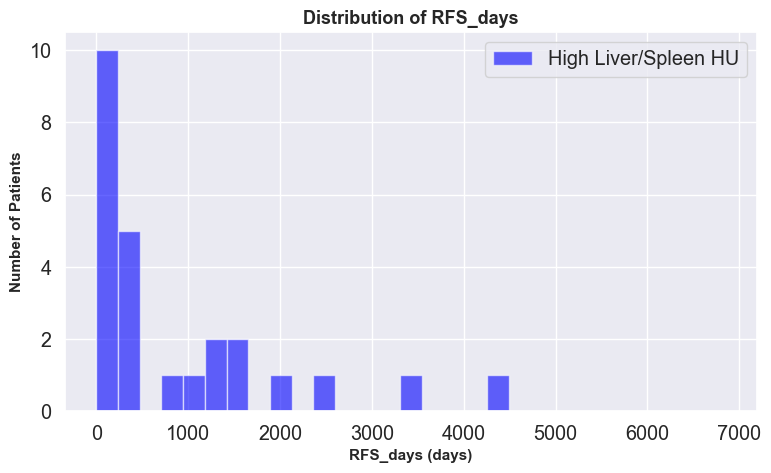

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
bins = np.linspace(0, max(nash_data["RFS_days"]), 30)

plt.hist(
    nash_data[nash_data["LRE"] == 1]["RFS_days"],
    bins=bins,
    alpha=0.6,
    label="High Liver/Spleen HU",
    color="blue",
)

# Labels and formatting
plt.title("Distribution of RFS_days", fontsize=13, fontweight="bold")
plt.xlabel("RFS_days (days)", fontsize=11, fontweight="bold")
plt.ylabel("Number of Patients", fontsize=11, fontweight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
nash_data[nash_data["LRE"] == 1]["RFS_days"].unique()

array([3.380e+02, 4.359e+03, 1.000e+00, 6.800e+01, 1.025e+03, 2.458e+03,
       3.320e+03, 1.623e+03, 3.770e+02, 3.170e+02, 4.800e+01, 2.100e+01,
       1.371e+03, 1.300e+01, 2.098e+03, 9.000e+02, 5.200e+01, 1.526e+03,
       3.290e+02, 1.410e+03, 2.000e+00, 5.000e+00, 4.450e+02])

## Kaplan-Meier Plots along with "Number at Risk"

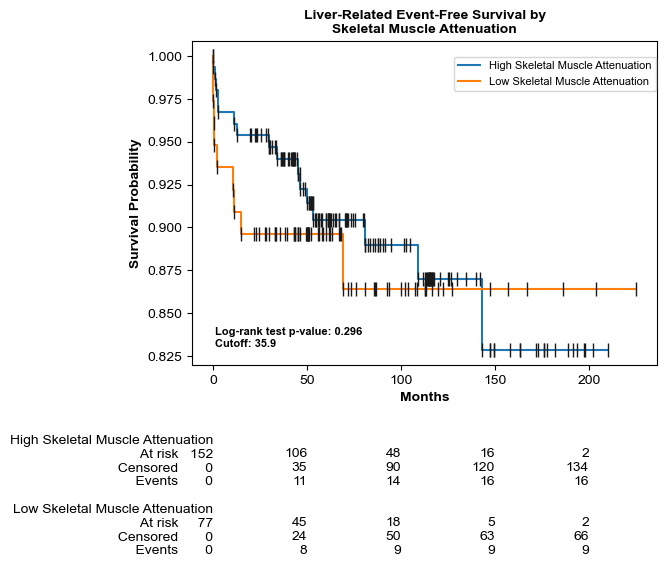

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt
import numpy as np

# Define the metric and cutoff you want to analyze
metric = "Skeletal Muscle Attenuation"  # Change this to "Liver/Spleen HU", "LSM", etc.
cutoff = 35.90  # Replace with your actual cutoff value

# Label for plot lines
high_label = f"High {metric}"
low_label = f"Low {metric}"

# Create Kaplan-Meier objects
kmf_rfs_high = KaplanMeierFitter()
kmf_rfs_low = KaplanMeierFitter()

# Fit the data
kmf_rfs_high.fit(
    durations=matched_treated["RFS_days"] / 30.44,
    event_observed=matched_treated["event_observed_RFS"],
    label=high_label,
)
kmf_rfs_low.fit(
    durations=matched_control["RFS_days"] / 30.44,
    event_observed=matched_control["event_observed_RFS"],
    label=low_label,
)

# Perform the log-rank test
results_rfs = logrank_test(
    durations_A=matched_treated["RFS_days"],
    durations_B=matched_control["RFS_days"],
    event_observed_A=matched_treated["event_observed_RFS"],
    event_observed_B=matched_control["event_observed_RFS"],
)

# Calculate p-value
two_sided_p_value = results_rfs.p_value
test_statistic = results_rfs.test_statistic
one_sided_p_value = (
    two_sided_p_value / 2 if test_statistic > 0 else 1 - (two_sided_p_value / 2)
)

# Plot
plt.rcdefaults()
plt.figure(figsize=(6, 4.2))
plt.rcParams["font.family"] = "Arial"
ax = plt.subplot(111)

# Plot KM curves
kmf_rfs_high.plot_survival_function(ax=ax, ci_show=False, legend=False)
kmf_rfs_low.plot_survival_function(ax=ax, ci_show=False, legend=False)

# Axis labels
ax.set_xlabel("Months", fontweight="bold")
ax.set_ylabel("Survival Probability", fontweight="bold")

# Add tick marks for events
for time_point in kmf_rfs_high.event_table.index:
    if time_point >= 0:
        prob = kmf_rfs_high.survival_function_.at[time_point, high_label]
        ax.plot(time_point, prob, "k|", markersize=10)

for time_point in kmf_rfs_low.event_table.index:
    if time_point >= 0:
        prob = kmf_rfs_low.survival_function_.at[time_point, low_label]
        ax.plot(time_point, prob, "k|", markersize=10)

# Annotate p-value and cutoff
p_value_text = f"Log-rank test p-value: {one_sided_p_value:.3f}\n" f"Cutoff: {cutoff}"
ax.text(
    0,
    0.05,
    p_value_text,
    verticalalignment="bottom",
    horizontalalignment="left",
    transform=ax.transAxes,
    fontsize=8,
    fontweight="bold",
)

# Add number at risk table
add_at_risk_counts(kmf_rfs_high, kmf_rfs_low, ax=ax)

# Adjust the text alignment for "Number at risk"
for text in ax.texts[-2:]:
    text.set_x(text.get_position()[0] + 0.05)

# Make the "Number at risk" title bold
for text in ax.texts:
    if "Number at risk" in text.get_text():
        text.set_fontweight("bold")

# Show axis lines
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

# Legend
ax.legend(bbox_to_anchor=(0.55, 0.97), loc="upper left", title="", fontsize=8)

import re

# Clean the metric name to be filename-safe
safe_metric = re.sub(r'[\\\\/:*?"<>|]', "_", metric)

# Save figure
plt.title(
    f"Liver-Related Event-Free Survival by\n{metric}", fontsize=10, fontweight="bold"
)

plt.savefig(f"{safe_metric}_LRE.jpg", bbox_inches="tight", dpi=600)
plt.show()

In [22]:
one_sided_p_value

0.2962613263555584

In [23]:
# Find median RFS
median_rfs_ic = kmf_rfs_high.median_survival_time_
median_rfs_cn = kmf_rfs_low.median_survival_time_

print(f"Median RFS for High group: {median_rfs_ic:.2f} months")
print(f"Median RFS for Low group: {median_rfs_cn:.2f} months")

Median RFS for High group: inf months
Median RFS for Low group: inf months


# Univariable Analysis (Crude HR) by Subgroup

In [50]:
matched_df = nash_data.copy()

In [51]:
import warnings
from lifelines.utils import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [52]:
matched_df.columns

Index(['ID', 'Sex', 'Birth Date', 'Age', 'Steatosis Score', 'Fibrosis Stage',
       'NASH', 'NAFLD Type', 'Death Date', 'Death', 'Waist to Height', 'Waist',
       'BMI_C', 'BMI', 'Height', 'Weight', 'Last F/U', 'Smoking', 'Ascites',
       'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date',
       'LT', 'LT_Date', 'SBP', 'DBP', 'VFA (Volume)', 'SMI', 'TFI', 'SFI',
       'VFI', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)',
       'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM', 'LSM_C', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG',
       '당뇨병/당뇨병 전단계 유무', 'FIB-4', 'FIB-4_C', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosi

In [ ]:
# Multivariate analysis for all groups
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already preprocessed and available

# Define continuous and categorical variables
continuous_vars = [
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "LSM",
    "CAP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    "SBP",
    "DBP",
    "FIB-4",
]


# Convert continuous variables to binary (above/below median)
for var in continuous_vars:
    median_value = matched_df[var].median()
    matched_df[f"{var}_above_median"] = (matched_df[var] > median_value).astype(int)

# List of categorical variables
categorical_vars = [
    "Sex",
    "Smoking",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]

# Define the list of covariates for the Cox model
covariates = [f"{var}_above_median" for var in continuous_vars] + [
    cat for cat in categorical_vars
]

In [54]:
covariates

['Age_above_median',
 'Weight_above_median',
 'Height_above_median',
 'Waist to Height_above_median',
 'Waist_above_median',
 'BMI_above_median',
 'VFI_above_median',
 'SFI_above_median',
 'TFI_above_median',
 'SMI_above_median',
 'VFA (Volume)_above_median',
 'SFA (Volume)_above_median',
 'Spleen (Volume)_above_median',
 'VFA (Area)_above_median',
 'SFA (Area)_above_median',
 'SMA (Area)_above_median',
 'VFA (Attenuation)_above_median',
 'SFA (Attenuation)_above_median',
 'SMA (Attenuation)_above_median',
 'Liver/Spleen Volume_above_median',
 'Liver/Spleen HU_above_median',
 'Liver (HU)_above_median',
 'Spleen (HU)_above_median',
 'Liver (PDFF)_above_median',
 'LSM_above_median',
 'CAP_above_median',
 'AST_above_median',
 'ALT_above_median',
 'T.bil_above_median',
 'PLT_above_median',
 'PT INR_above_median',
 'Alb_above_median',
 'Glucose_above_median',
 'HbA1c_above_median',
 'eGFR_above_median',
 'T.chol_above_median',
 'HDL_above_median',
 'LDL_above_median',
 'TG_above_median',
 '

In [ ]:
# Calculate the median values for continuous variables
median_values = matched_df[continuous_vars].median()

# Print the median values for each variable
print("Median values for continuous variables:")
print(median_values)

Median values for continuous variables:
Age                      56.000000
Weight                   72.000000
Height                  165.000000
Waist to Height           5.469079
Waist                   910.159119
BMI                      26.370238
VFI                     375.647508
SFI                     515.137033
TFI                     890.144458
SMI                      47.988166
VFA (Volume)           1032.168688
SFA (Volume)           1382.266000
Spleen (Volume)         199.286563
VFA (Area)              149.392520
SFA (Area)              179.932109
SMA (Area)              130.988740
VFA (Attenuation)       -96.838936
SFA (Attenuation)      -101.844116
SMA (Attenuation)        35.900383
Liver/Spleen Volume       7.683849
Liver/Spleen HU           0.932730
Liver (HU)               46.538898
Spleen (HU)              46.524864
Liver (PDFF)             11.066558
LSM                       7.700000
CAP                     280.000000
AST                      43.000000
ALT            

In [56]:
covariates_group = covariates + ["group"]

In [ ]:
from lifelines import CoxPHFitter
from lifelines.exceptions import ConvergenceError
import pandas as pd

# Placeholder for significant variables
significant_covariates_rfs = []
significant_covariates_os_css = []


# Function to perform univariable Cox regression and collect significant variables
def univariable_analysis(matched_df, duration_col, event_col, covariates):
    significant_vars = []
    skipped_vars = []

    for var in covariates:
        try:
            # Drop NA values to avoid fitting errors
            df_subset = matched_df[[duration_col, event_col, var]].dropna()

            # Skip if variable has no variation
            if df_subset[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            cph = CoxPHFitter()
            cph.fit(df_subset, duration_col=duration_col, event_col=event_col)

            p_value = cph.summary.loc[var, "p"]
            if p_value < 0.05:
                significant_vars.append(var)

        except ConvergenceError as e:
            print(f"⚠️ Skipping '{var}' due to convergence error.")
            skipped_vars.append(var)
        except Exception as e:
            print(f"⚠️ Skipping '{var}' due to unexpected error: {e}")
            skipped_vars.append(var)

    print(
        f"\n✅ Finished univariable analysis. Skipped {len(skipped_vars)} variables due to issues."
    )
    return significant_vars


# Run for RFS
significant_covariates_rfs = univariable_analysis(
    matched_df, "RFS_days", "event_observed_RFS", covariates
)
print("\n🟢 Significant covariates for RFS (p < 0.05):")
print(significant_covariates_rfs)

# Example for OS/CSS (uncomment if needed)
# significant_covariates_os_css = univariable_analysis(matched_df, 'OS_CSS_days', 'Death', covariates + ["group"])
# print("\n🟢 Significant covariates for OS/CSS (p < 0.05):")
# print(significant_covariates_os_css)


✅ Finished univariable analysis. Skipped 0 variables due to issues.

🟢 Significant covariates for RFS (p < 0.05):
['Height_above_median', 'SMA (Area)_above_median', 'SMA (Attenuation)_above_median', 'LSM_above_median', 'AST_above_median', 'PLT_above_median', 'LDL_above_median', 'FIB-4_above_median', 'Sex', 'Cerebrovascualr disease 유무']


In [ ]:
from lifelines import CoxPHFitter
from lifelines.exceptions import ConvergenceError


def backward_stepwise_cox(df, duration_col, event_col, covariates, threshold=0.05):
    remaining_vars = covariates.copy()
    cph = CoxPHFitter()

    while len(remaining_vars) > 0:
        try:
            cph.fit(
                df[[duration_col, event_col] + remaining_vars],
                duration_col=duration_col,
                event_col=event_col,
            )
            summary = cph.summary
            max_p = summary["p"].max()
            if max_p > threshold:
                worst_var = summary["p"].idxmax()
                remaining_vars.remove(worst_var)
            else:
                break
        except ConvergenceError as e:
            print(f"⚠️ Convergence error with variables: {remaining_vars}")
            break
        except Exception as e:
            print(f"❌ Unexpected error: {e}")
            break

    # Final model with selected variables
    cph.fit(
        df[[duration_col, event_col] + remaining_vars],
        duration_col=duration_col,
        event_col=event_col,
    )
    return cph, remaining_vars


# Run backward stepwise for RFS
final_cph_rfs, final_vars_rfs = backward_stepwise_cox(
    matched_df,
    duration_col="RFS_days",
    event_col="event_observed_RFS",
    covariates=significant_covariates_rfs,  # your list from univariable analysis
    threshold=0.05,
)

# Print final model summary
final_cph_rfs.print_summary()

<lifelines.CoxPHFitter: fitted with 229 total observations, 204 right-censored observations>
             duration col = 'RFS_days'
                event col = 'event_observed_RFS'
      baseline estimation = breslow
   number of observations = 229
number of events observed = 25
   partial log-likelihood = -115.83
         time fit was run = 2025-04-10 01:30:18 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                          
SMA (Area)_above_median     -1.45       0.23       0.51            -2.46            -0.45                 0.09                 0.64
LSM_above_median             1.33       3.77       0.43             0.47             2.18                 1.61                 8.85
Cerebrovascualr disease 유무   1.62       5.04       0.64             0.37             2.86                 1.45                17.51

                             cmp to     z      p   -log2(p)
covariate                                                  
SMA (Area)_above_median        0.00 -2.83 <0.005       7.74
LSM_above_median               0.00  3.05 <0.005       8.78
Cerebrovascualr disease 유무     0.00  2.55   0.01       6.53
---
Concordance = 0.74
Partial AIC = 237.66
log-likelihood ratio test = 24.45 on 3 df
-log2(p) of ll-ratio test = 15.60

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# Assuming matched_df is your dataset and already contains binary covariates

cph_adjusted = CoxPHFitter()
cph_adjusted.fit(
    matched_df[["RFS_days", "event_observed_RFS"] + final_vars_rfs],
    duration_col="RFS_days",
    event_col="event_observed_RFS",
)

# Extract and format the result
summary = cph_adjusted.summary
summary["Adjusted HR (95% CI)"] = summary.apply(
    lambda row: f"{row['exp(coef)']:.2f} ({row['exp(coef) lower 95%']:.2f}-{row['exp(coef) upper 95%']:.2f})",
    axis=1,
)
summary["P-value"] = summary["p"].round(4)

# Final table
result_table = summary[["Adjusted HR (95% CI)", "P-value"]]
print(result_table)

                           Adjusted HR (95% CI)  P-value
covariate                                               
SMA (Area)_above_median        0.23 (0.09-0.64)   0.0047
LSM_above_median               3.77 (1.61-8.85)   0.0023
Cerebrovascualr disease 유무    5.04 (1.45-17.51)   0.0108


In [ ]:
import pandas as pd

# Simulated matched_df structure with relevant columns
# In real use, matched_df should be your actual dataset
# Columns: group (1: SGLT2-inh users, 0: non-users), event_observed_RFS, RFS_days,
#          and categorical cutoffs like LSM_above_median, AST_above_median, etc.


# Define a function to calculate events, person-years, and incidence rate
def calculate_incidence_stats(df, group_col, time_col, event_col):
    total_events = df[event_col].sum()
    total_person_years = df[time_col].sum() / 365.25
    incidence_rate = total_events / total_person_years * 10000  # per person-year
    return total_events, total_person_years, incidence_rate


# Define a function to run Cox regression (crude model) for a binary exposure
from lifelines import CoxPHFitter


def run_crude_cox(df, exposure, duration_col, event_col):
    cph = CoxPHFitter()
    try:
        cph.fit(
            df[[duration_col, event_col, exposure]],
            duration_col=duration_col,
            event_col=event_col,
        )
        summary = cph.summary
        hr = summary.loc[exposure, "exp(coef)"]
        lower = summary.loc[exposure, "exp(coef) lower 95%"]
        upper = summary.loc[exposure, "exp(coef) upper 95%"]
        p_value = summary.loc[exposure, "p"]
        return hr, lower, upper, p_value
    except:
        return None, None, None, None


# Define all exposure variables you want to stratify by
exposures = [
    "Height_above_median",
    "SMA (Area)_above_median",
    "SMA (Attenuation)_above_median",
    "LSM_above_median",
    "AST_above_median",
    "PLT_above_median",
    "LDL_above_median",
    "FIB-4_above_median",
    "Sex",
    "Cerebrovascualr disease 유무",
]

# Prepare results
results = []

# Assume matched_df is defined
for var in exposures:
    subgroups = matched_df[var].dropna().unique()
    for val in sorted(subgroups, reverse=True):  # Ensure 1 comes before 0
        subset = matched_df[matched_df[var] == val]
        events, py, ir = calculate_incidence_stats(
            subset, var, "RFS_days", "event_observed_RFS"
        )

        if val == 1:
            hr, low, high, p = run_crude_cox(
                matched_df, var, "RFS_days", "event_observed_RFS"
            )
            hr_str = f"{hr:.2f} ({low:.2f}-{high:.2f})" if hr else "NA"
        else:
            hr_str = "1.00 (reference)"
            p = ""

        results.append(
            {
                "Variable": var,
                "Group": f"{var} = {val}",
                "Events": events,
                "Person-years": round(py, 2),
                "Incidence Rate": round(ir, 4),
                "Crude HR (95% CI)": hr_str,
                "P-value": round(p, 4) if p != "" else "",
            }
        )

In [35]:
results

[{'Variable': 'Height_above_median',
  'Group': 'Height_above_median = 1',
  'Events': 5,
  'Person-years': 709.88,
  'Incidence Rate': 70.4341,
  'Crude HR (95% CI)': '0.26 (0.10-0.69)',
  'P-value': 0.0068},
 {'Variable': 'Height_above_median',
  'Group': 'Height_above_median = 0',
  'Events': 20,
  'Person-years': 734.92,
  'Incidence Rate': 272.138,
  'Crude HR (95% CI)': '1.00 (reference)',
  'P-value': ''},
 {'Variable': 'SMA (Area)_above_median',
  'Group': 'SMA (Area)_above_median = 1',
  'Events': 5,
  'Person-years': 751.15,
  'Incidence Rate': 66.5645,
  'Crude HR (95% CI)': '0.24 (0.09-0.65)',
  'P-value': 0.0046},
 {'Variable': 'SMA (Area)_above_median',
  'Group': 'SMA (Area)_above_median = 0',
  'Events': 20,
  'Person-years': 693.65,
  'Incidence Rate': 288.3283,
  'Crude HR (95% CI)': '1.00 (reference)',
  'P-value': ''},
 {'Variable': 'SMA (Attenuation)_above_median',
  'Group': 'SMA (Attenuation)_above_median = 1',
  'Events': 7,
  'Person-years': 758.28,
  'Incidenc

# Fibrosis에 대한 OR

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create binary label for fibrosis (e.g., advanced fibrosis defined as stage ≥ 3)
df = matched_df.copy()
df["Advanced_Fibrosis"] = (df["Steatosis Score"].isin([3])).astype(
    int
)  # (df["Fibrosis"] >= 2).astype(int)


# Function to perform univariable logistic regression and return OR, CI, and p-value
def logistic_odds_ratio_analysis(df, covariates, outcome_col):
    results = []

    for var in covariates:
        try:
            sub_df = df[[outcome_col, var]].dropna()

            if sub_df[var].nunique() <= 1:
                print(f"⚠️ Skipping '{var}' — only one unique value.")
                continue

            sub_df = sm.add_constant(sub_df)
            model = sm.Logit(sub_df[outcome_col], sub_df[["const", var]]).fit(disp=0)

            odds_ratio = np.exp(model.params[var])
            conf = model.conf_int().loc[var]
            ci_lower, ci_upper = np.exp(conf[0]), np.exp(conf[1])

            pval = model.pvalues[var]

            results.append(
                {
                    "Variable": var,
                    "OR": odds_ratio,
                    "95% CI Lower": ci_lower,
                    "95% CI Upper": ci_upper,
                    "p-value": pval,
                }
            )
        except Exception as e:
            print(f"❌ Error with '{var}': {e}")
            continue

    return pd.DataFrame(results).sort_values(by="p-value")


# Run the analysis
odds_ratio_results = logistic_odds_ratio_analysis(
    df, covariates, outcome_col="Advanced_Fibrosis"
)
odds_ratio_results

C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


,Variable,OR,95% CI Lower,95% CI Upper,p-value
34,eGFR_above_median,7.910000e+00,1.754697,35.657499,0.007106
39,SBP_above_median,7.910000e+00,1.754697,35.657499,0.007106
40,DBP_above_median,5.591398e+00,1.548022,20.195919,0.008618
25,CAP_above_median,4.179775e+00,1.305221,13.385104,0.016017
24,LSM_above_median,3.731646e+00,1.250791,11.133098,0.018215
2,Height_above_median,3.390000e+00,1.059386,10.847889,0.039669
15,SMA (Area)_above_median,3.264706e+00,1.020293,10.446320,0.046172
20,Liver/Spleen HU_above_median,3.121212e-01,0.097547,0.998695,0.049743
38,TG_above_median,2.949451e+00,0.990238,8.785016,0.052095
0,Age_above_median,3.180428e-01,0.099399,1.017626,0.053543


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve

# Use a copy of the original DataFrame
df_model = df.copy()

# Define the outcome variable
df_model["Advanced_Fibrosis"] = (df_model["Steatosis Score"].isin([3])).astype(
    int
)  # (df["Fibrosis"] >= 2).astype(int)

# (df_model["Fibrosis"] >= 2).astype(int)

# Filter the covariates from previous univariable results
significant_vars = odds_ratio_results[odds_ratio_results["p-value"] < 0.05][
    "Variable"
].tolist()

# Exclude LSM from modeling
significant_vars = [var for var in significant_vars if var != "LSM_above_median"]

# Drop rows with missing values for selected covariates and outcome
model_df = df_model[["Advanced_Fibrosis"] + significant_vars].dropna()

# Define X and y
X = model_df[significant_vars]
y = model_df["Advanced_Fibrosis"]

# Add constant for intercept
X = sm.add_constant(X)


# Perform backward stepwise logistic regression
def backward_stepwise(X, y, threshold_out=0.05):
    remaining_vars = X.columns.tolist()
    while len(remaining_vars) > 1:
        model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
        pvals = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvals.max()
        if max_pval > threshold_out:
            excluded_var = pvals.idxmax()
            remaining_vars.remove(excluded_var)
        else:
            break
    final_model = sm.Logit(y, X[remaining_vars]).fit(disp=0)
    return final_model, remaining_vars


# Run backward stepwise
final_model, final_vars = backward_stepwise(X, y)

# Predict probabilities and calculate AUC
y_pred = final_model.predict(X[final_vars])
auc = roc_auc_score(y, y_pred)

# Extract the summary table
summary_df = final_model.summary2().tables[1]

# Calculate Odds Ratios and 95% CI
summary_df["OR"] = summary_df["Coef."].apply(lambda x: round(np.exp(x), 3))
summary_df["CI Lower"] = (summary_df["Coef."] - 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["CI Upper"] = (summary_df["Coef."] + 1.96 * summary_df["Std.Err."]).apply(
    lambda x: round(np.exp(x), 3)
)
summary_df["AUC"] = round(auc, 5)

# Optional: Rearrange columns
summary_df = summary_df[
    ["Coef.", "Std.Err.", "P>|z|", "OR", "CI Lower", "CI Upper", "AUC"]
]

summary_df

,Coef.,Std.Err.,P>|z|,OR,CI Lower,CI Upper,AUC
const,-7.034463,1.185340,2.946449e-09,0.001,0.000,0.009,0.8659
eGFR_above_median,2.447638,0.797240,2.139575e-03,11.561,2.423,55.159,0.8659
SBP_above_median,2.543161,0.799394,1.465852e-03,12.720,2.655,60.945,0.8659
CAP_above_median,1.660755,0.636740,9.101615e-03,5.263,1.511,18.334,0.8659


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np


def bootstrap_auc_ci(y_true, y_pred_prob, n_bootstraps=1000, ci=0.95, random_state=42):
    y_true = np.array(y_true)
    y_pred_prob = np.array(y_pred_prob)

    np.random.seed(random_state)
    bootstrapped_scores = []

    for _ in range(n_bootstraps):
        indices = np.random.choice(len(y_true), size=len(y_true), replace=True)
        if len(np.unique(y_true[indices])) < 2:
            continue
        score = roc_auc_score(y_true[indices], y_pred_prob[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.sort(bootstrapped_scores)
    lower = np.percentile(sorted_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(sorted_scores, (1 + ci) / 2 * 100)

    return round(lower, 3), round(upper, 3)


ci_lower, ci_upper = bootstrap_auc_ci(y_true, y_pred)
print(f"95% CI for AUC: {ci_lower} – {ci_upper}")

95% CI for AUC: 0.928 – 0.995


AUC: 0.970
Best Cutoff: 0.832 | Sensitivity: 0.928 | Specificity: 0.950


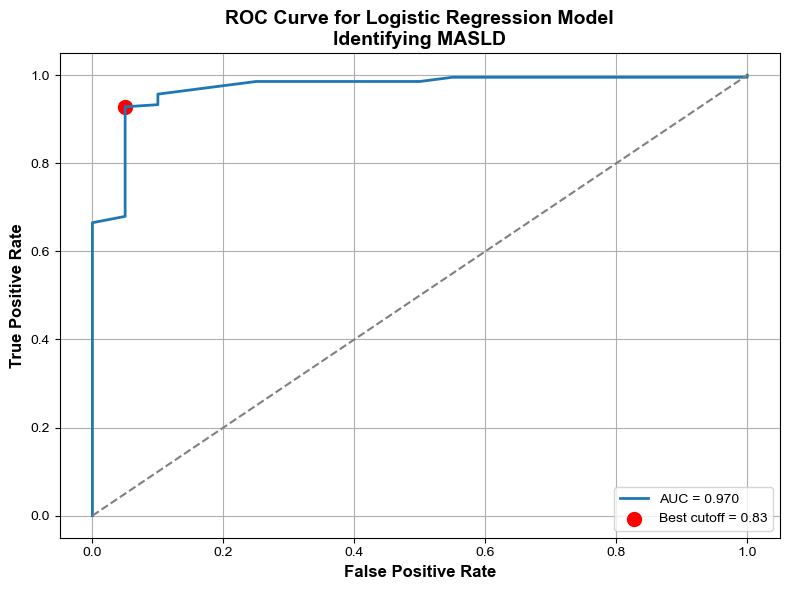

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Use the predicted probabilities from the final model
y_prob = final_model.predict(X[final_vars])  # predicted probabilities
y_true = y.values  # true labels

# Calculate AUC
auc = roc_auc_score(y_true, y_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate Youden’s J statistic to find the best cutoff
youden_index = tpr - fpr
best_idx = np.argmax(youden_index)
best_cutoff = thresholds[best_idx]
best_sens = tpr[best_idx]
best_spec = 1 - fpr[best_idx]

# Print cutoff information
print(f"AUC: {auc:.3f}")
print(
    f"Best Cutoff: {best_cutoff:.3f} | Sensitivity: {best_sens:.3f} | Specificity: {best_spec:.3f}"
)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line

# Annotate best cutoff
plt.scatter(
    fpr[best_idx],
    tpr[best_idx],
    color="red",
    label=f"Best cutoff = {best_cutoff:.2f}",
    s=100,
)

plt.title(
    "ROC Curve for Logistic Regression Model\nIdentifying MASLD",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# Optional: Save the figure
plt.savefig("ROC_LogReg_Significant_Fibrosis.png", dpi=600, bbox_inches="tight")
plt.show()